In [1]:
using NSHeat

In [2]:
using Plots

In [3]:
kB = NSHeat.kB

1.38e-16

# Cooling

The easiest way to load model parameters is via ini file

In [4]:
model, core, env, var = setup("sample.ini");

These four objects governs the star evolution.

See "NeutronStar.jl"

For instance, core manages static model parameters which do not chagnge by time.

In [5]:
core.r_core[1:10]

10-element Array{Float64,1}:
     0.0
 10000.0
 20000.0
 30000.0
 40000.0
 50000.0
 60000.0
 70000.0
 80000.0
 90000.0

For instance, this r_core is the slice of radius in unit of cm.

In [6]:
core.kFn[1:10]

10-element Array{Float64,1}:
 2.430263969922604 
 2.430228588029835 
 2.43012244170755  
 2.429945522221449 
 2.4296977933172905
 2.429379076783246 
 2.428989369774359 
 2.4285283837081324
 2.4279959201566608
 2.4273918673193076

And this is the correspoding neutron Fermi wave numbers in units of 1/fm.

To obtain NS cooling curve, one passes these four objects to cooling function:

In [7]:
sol = cooling(model, core, env, var);

In [8]:
sol

([1.0, 1.0512710963760241, 1.1051709180756477, 1.161834242728283, 1.2214027581601699, 1.2840254166877414, 1.3498588075760032, 1.4190675485932573, 1.4918246976412703, 1.5683121854901687  …  6.53213709469783e9, 6.867046925221489e9, 7.219127949943205e9, 7.58926055481557e9, 7.978370264144282e9, 8.387430054880835e9, 8.817462789571796e9, 9.269543774047945e9, 9.744803446248903e9, 1.0e10], [1.0e10, 1.2273069388761022e9, 1.088805285474064e9, 1.0133341243172252e9, 9.617587271240454e8, 9.226527029269891e8, 8.911560197672005e8, 8.647367446430728e8, 8.419703838658533e8, 8.219281861116853e8  …  0.000912081551266472, 0.0008101855110850602, 0.0007203437688182552, 0.0006400414809729837, 0.0005682589362328411, 0.0005041214397729789, 0.00044730106040315957, 0.0003970680746933089, 0.0003521798282081955, 0.0003304759424812671], :Success)

sol = (t, T, flag), where t is time in units of year, and T[K] is the internal temperature.

flag = :Success if solving ODE finishes correctly.

In [9]:
sol[end]

:Success

In [10]:
model, core, env, var = setup("sample2.ini")
t2, u2 = cooling(model, core, env, var);

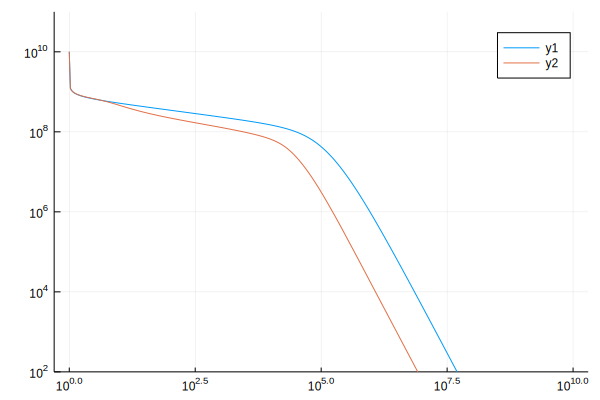

In [11]:
t, u = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t2, u2, scale=:log10, yscale=:log10)
ylims!(1e2,1e11)

# Heating

Rotochemical heating can be performed in the same way.

In [12]:
model, core, env, var = setup("sample.ini")
sol = heating(model, core, env, var);

In [13]:
sol

([1.0, 1.0512710963760241, 1.1051709180756477, 1.161834242728283, 1.2214027581601699, 1.2840254166877414, 1.3498588075760032, 1.4190675485932573, 1.4918246976412703, 1.5683121854901687  …  6.53213709469783e9, 6.867046925221489e9, 7.219127949943205e9, 7.58926055481557e9, 7.978370264144282e9, 8.387430054880835e9, 8.817462789571796e9, 9.269543774047945e9, 9.744803446248903e9, 1.0e10], [1.0e10, 1.227302844434411e9, 1.0888174281143134e9, 1.013329556303929e9, 9.617570675601149e8, 9.226615104880306e8, 8.911460741967824e8, 8.647312584388804e8, 8.419738939436673e8, 8.219231382722094e8  …  305506.66410574847, 292084.6596775697, 279287.2650554712, 267059.62760791637, 255353.58634657468, 244170.78740983247, 233504.57412984315, 223333.87254059888, 213605.2783995918, 208735.13099970948], [1.0e-30, 2.563685212832296e-15, 5.258773262808459e-15, 8.092042647447416e-15, 1.1070592096344607e-14, 1.4201851541881477e-14, 1.7493860283033813e-14, 2.0954279767268682e-14, 2.4592511823424406e-14, 2.84168625126667

Here, sol = (t, T, eta_e_inf, eta_mu, flag), where eta_e_inf and eta_mu_inf are the chemical imbalances in units of erg.

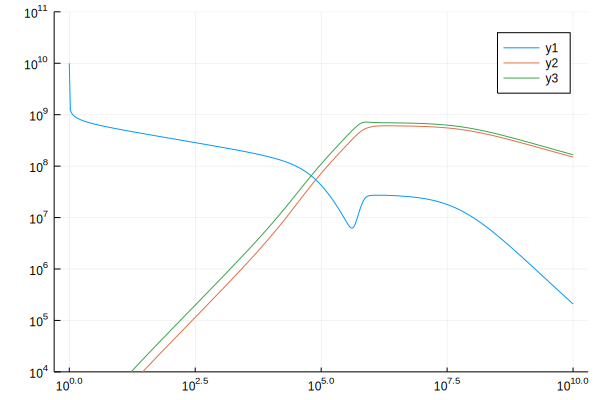

In [14]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)

In [15]:
model, core, env, var = setup("sample2.ini")
sol = heating(model, core, env, var);

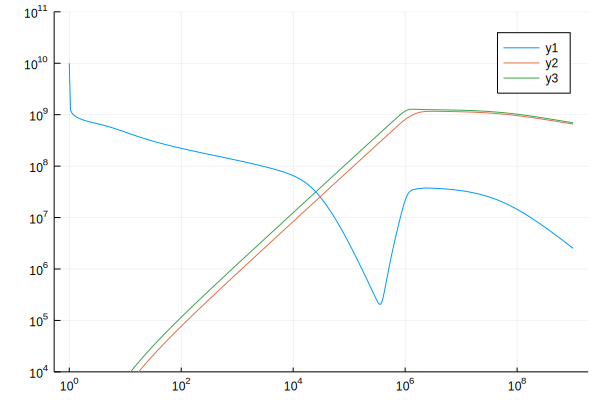

In [16]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)

# Check output module

One can save solution of cooling/heating, as well as input parameters, by the following functions

In [17]:
output_T(sol, model, core, env, var)
output_LC(sol, model, core, env, var)
write_ini(sol, model)

In [18]:
model, core, env, var = setup(model.output_dir * model.modelname * ".ini")
sol = heating(model, core, env, var);

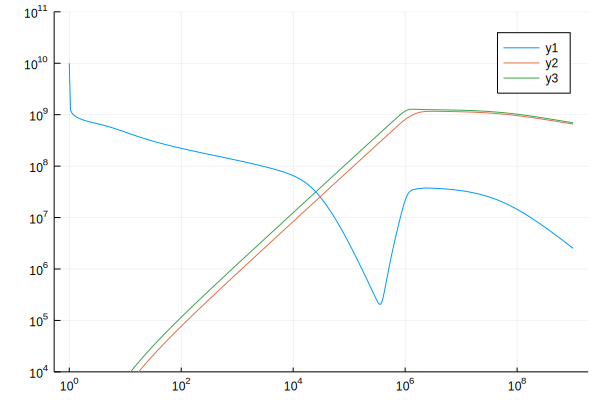

In [19]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e4,1e11)

# DM heating

In [20]:
model, core, env, var = setup("sample3.ini")
sol = heating(model, core, env, var);

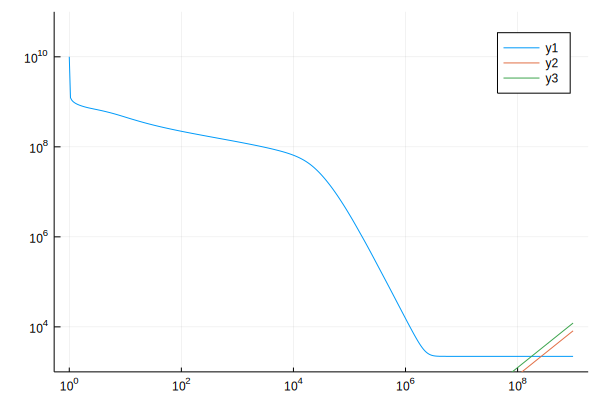

In [21]:
t, u, e, mu = sol
plot(t, u, scale=:log10, yscale=:log10)
plot!(t, e./kB, scale=:log10)
plot!(t, mu./kB, scale=:log10)
ylims!(1e3,1e11)